# Lab 5: PageRank, TrustRank, HITS

### Before you start

- Notebook tasks can be completed individually or in a group of two
- Please save your notebooks with filled cell outputs; this will speed up the checking process
- Send notebook with solutions via e-mail:
  - To: michal.wojcik@doctorate.put.poznan.pl
  - Subject format example: [IR] Lab 5 - Jan Kowalski 123456, Anna Nowak 789012
  - Attachment: notebook file
- **Deadline:** 14 days after the class
- Some of the tasks require implementation - complete the code
- Some of the tasks require answering questions - answer them in Markdowns (just below the questions)
- The number of points for each task is given next to the command

In [67]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### Task 1 - graphs definition [4p]

Prepare some graphs with the *networkx* library as described. Show:
- list of nodes
- adjacency matrix
- draw a graph

**a) *Random* graph: [1p]**

Create directed graph ([nx.DiGraph](https://networkx.org/documentation/stable/reference/classes/digraph.html)) with:
  - 10 nodes
  - 25 edges (generated randomly or manually; self-loops are possible but not required)
  - *connected* (according to the default concept of conectivity - there is at least one path connecting each pair of nodes; let's additionally assume that not all of the paths need to be *directed*)

**NOTE:** set the random seed so that the graph is reproducible or declare the edges manually

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 1]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1]]


C:\Users\samue\AppData\Local\Temp/ipykernel_15220/3197931454.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G_random).todense())


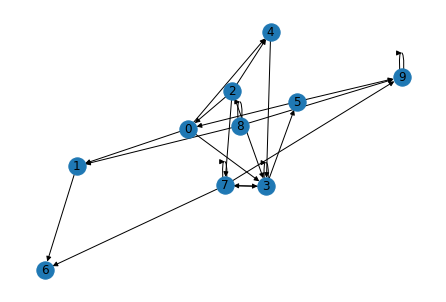

In [68]:
G_random = nx.DiGraph()
np.random.seed(0) # Setting a seed for reproducibility
G_random.add_nodes_from(range(10))
edges = [(np.random.randint(0, 10), np.random.randint(0, 10)) for _ in range(25)]
G_random.add_edges_from(edges)

print(G_random.nodes)
print(nx.adjacency_matrix(G_random).todense())
nx.draw(G_random, with_labels=True)

**b) *Spider-trap* graph: [1p]**

Create directed graph with:
- at least 5 nodes
- at least 2 nodes in *spider-trap(s)* (two separate *traps* or one *trap* with two nodes)

**NOTE:** declare the edges manually

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]]


C:\Users\samue\AppData\Local\Temp/ipykernel_15220/1776042366.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G_spider_trap).todense())


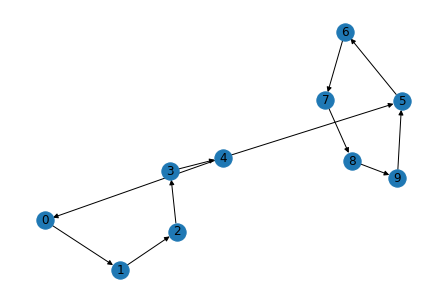

In [69]:
G_spider_trap = nx.DiGraph()

# Add nodes
G_spider_trap.add_nodes_from(range(10))

edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)]
G_spider_trap.add_edges_from(edges)

print(G_spider_trap.nodes)
print(nx.adjacency_matrix(G_spider_trap).todense())
nx.draw(G_spider_trap, with_labels=True)

**c) *Dead-end* graph: [1p]**

Create directed graph with:
- at least 5 nodes
- 1 or 2 nodes as a *dead-end(s)*

**NOTE:** declare the edges manually

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Adjacency Matrix:
 [[0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


C:\Users\samue\AppData\Local\Temp/ipykernel_15220/2427017842.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print("Adjacency Matrix:\n", nx.adjacency_matrix(G_dead_end).todense())


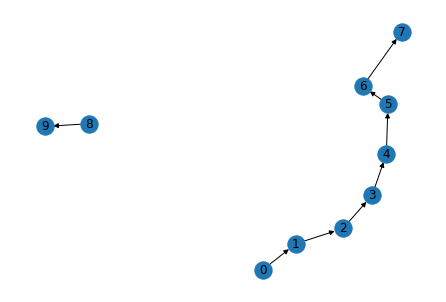

In [70]:
# Create the dead-end graph
G_dead_end = nx.DiGraph()

# Add nodes
G_dead_end.add_nodes_from(range(10))

# Add edges - ensure some nodes have no outgoing edges
edges = [
    (0, 1), (1, 2), (2, 3),
    (3, 4), (4, 5), (5, 6),
    (6, 7),
    (8, 9)
]
G_dead_end.add_edges_from(edges)

# Displaying the graph properties
print("Nodes:", G_dead_end.nodes)
print("Adjacency Matrix:\n", nx.adjacency_matrix(G_dead_end).todense())

# Drawing the graph
nx.draw(G_dead_end, with_labels=True)

**d) *Complete* graph: [1p]**

Create directed graph with:
- at least 5 nodes (**Hint:** 8 is drawn nicely)
- connection for every pair of distinct nodes (in both directions)

**NOTE:** declare the edges manually or use a dedicated method

[0, 1, 2, 3, 4, 5, 6, 7]
[[0 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1]
 [1 1 1 0 1 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 0]]


C:\Users\samue\AppData\Local\Temp/ipykernel_15220/1051802595.py:13: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G_complete).todense())


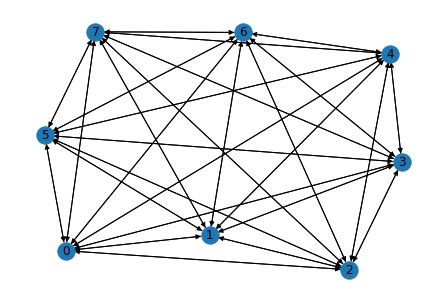

In [71]:
G_complete = nx.DiGraph()

# Add nodes
G_complete.add_nodes_from(range(8))  # Adds 8 nodes, numbered 0 through 7

# Add edges for every pair of distinct nodes, in both directions
for i in range(8):
    for j in range(8):
        if i != j:
            G_complete.add_edge(i, j)

print(G_complete.nodes)
print(nx.adjacency_matrix(G_complete).todense())
nx.draw(G_complete, with_labels=True)

### Task 2 - PageRank algorithm implementation [10p]

Implement two approaches to the PageRank algorithm.

Below is a reference function from the *networkx* package to verify the operation of the implemented functions

In [72]:
def networkx_pagerank(graph: nx.DiGraph, alpha: float = 0.85) -> list:
    # graph - NetworkX Graph
    # alpha - damping parameter (opposite to damping factor from the lecture presentation)
    
    # PageRank by NetworkX library
    pagerank = nx.pagerank(graph, alpha=alpha)

    # Sort dictionary by PageRank value
    pagerank_sorted = sorted(pagerank.items(), key=lambda v:(v[1],v[0]), reverse=True)
    return pagerank_sorted

networkx_pagerank(G_random)

[(9, 0.47414266960831075),
 (3, 0.12738812033936148),
 (7, 0.07884588449010836),
 (6, 0.07577643628629419),
 (5, 0.05753471825858207),
 (0, 0.05044978824589576),
 (1, 0.04421202037863436),
 (4, 0.04029151735148059),
 (8, 0.029917793588752815),
 (2, 0.021441051452579813)]

**a) *Random walk* approach [5p]**

Create a function that will estimate the PageRank value for each node in the graph using the "Random walk" strategy

- Randomly select start node
- In each iteration, with probability equal to:
  - $\alpha$ - go to one of the next nodes in the graph - randomly select one of the successors with equal probability
  - $1 - \alpha$ - go to a random node in the graph - simulate a situation when a user starts browsing from a new, randomly selected page
- If the algorithm reaches a *dead end*, go to a random node in the graph
- Count the occurrences of each node on the random walk (and normalize at the end to 1)
- Return the result in the same way as the *networkx_pagerank* function - a list of tuples sorted in descending order of PageRank values: (node_name, node_pagerank_value)
- Verify the method for different *alpha* values and graphs (random graph, dead end, spider trap, complete graph)

**NOTE:** for the sake of randomness, this result will be an approximation, but won't be exactly the same as in the *networkx_pagerank* function

In [73]:
def randomwalk_pagerank(G, alpha=0.85, iterations=100000):
    nodes = list(G.nodes)
    node_count = {node: 0 for node in nodes}
    
    # Randomly select start node
    current_node = random.choice(nodes)

    for _ in range(iterations):
        node_count[current_node] += 1

        if random.random() < alpha and G.out_degree(current_node) > 0:
            # Move to one of the successors
            current_node = random.choice(list(G.successors(current_node)))
        else:
            # Jump to a random node
            current_node = random.choice(nodes)
        
        # If dead end, jump to a random node
        if G.out_degree(current_node) == 0:
            current_node = random.choice(nodes)

    # Normalize the counts
    total_count = sum(node_count.values())
    pagerank = {node: count / total_count for node, count in node_count.items()}

    # Sort by PageRank value
    sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

    return sorted_pagerank

randomwalk_pagerank(G_random)

[(9, 0.50696),
 (3, 0.13721),
 (7, 0.08516),
 (5, 0.06177),
 (0, 0.05403),
 (1, 0.04855),
 (4, 0.04269),
 (8, 0.03313),
 (2, 0.02334),
 (6, 0.00716)]

**b) *Stochastic matrix* approach [5p]**

Create a function that will estimate the PageRank value for each of $N$ nodes in the graph using the stochastic adjacency matrix: $v = Mv$.

Using the damping parameter, in order to ensure normalization after each step, the formula changes as follows: $v = (1 - \alpha) \cdot v_{\text{start}} + \alpha \cdot Mv$, where $v_{\text{start}} = [\frac{1}{N}, \frac{1}{N}, \ldots, \frac{1}{N}]$.

- Start with $v = v_{\text{start}}$
- Normalize the adjacency matrix ($M$) so that each cell ($m_{ij}$) in the matrix determines the probability of going from $\text{node}_i$ to $\text{node}_j$
- At each iteration, update $v$ with a new vector $v' = (1 - \alpha) \cdot v_{\text{start}} + \alpha \cdot Mv$
- Stop the algorithm when the difference between each pair of the PageRank values for the same node in consecutive $v$ and $v'$ vectors is less than the *epsilon* parameter
- Return the result in the same way as the *networkx_pagerank* function - a list of tuples sorted in descending order of PageRank values: (node_name, node_pagerank_value)
- Verify the method for different alpha values and graphs (random graph, dead end, spider trap, complete graph)

**Hint:** in the case of *dead ends* it is necessary to modify the values in the matrix to simulate the same policy as in the *random walk* approach (*go to a random node*)

In [191]:
def stochastic_matrix_pagerank(graph: nx.DiGraph, alpha: float = 0.85, epsilon: float = 1e-6) -> list:
    N = len(graph)
    if N == 0:
        return []
    
    v_start = np.full(N, 1/N)
    v = np.copy(v_start)

    # Create the adjacency matrix
    M = nx.adjacency_matrix(graph).toarray().astype(float)
    sums = np.sum(M, axis=1).astype(float)
    for i in range(N):
        if sums[i] == 0:
            M[i] = np.full(N, 1/N)
        else:
            M[i] /= sums[i]
    
    # Iterative process with a maximum number of iterations
    while True:
        v_new = (1 - alpha) * v_start + alpha * np.dot(v, M)
        if np.max(np.abs(v_new - v)) < epsilon:
            break
        v = v_new

    pagerank = {node: v[i] for i, node in enumerate(graph.nodes)}
    pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
    

    return pagerank

stochastic_matrix_pagerank(G_random)

C:\Users\samue\AppData\Local\Temp/ipykernel_15220/1073369133.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M = nx.adjacency_matrix(graph).toarray().astype(float)


[(9, 0.474151543913889),
 (3, 0.12738556788942976),
 (7, 0.07884424192566745),
 (6, 0.07577517257180238),
 (5, 0.05753359129476546),
 (0, 0.05044895063756029),
 (1, 0.0442114616268596),
 (4, 0.04029100759435089),
 (8, 0.029917556833768934),
 (2, 0.021440905711906405)]

### Test the functions

**NOTE:** For some graphs, *networkx_pagerank* may have trouble generating results with $\alpha$ close to 1; in this case, note it and skip displaying this result

GRAPH_NAME: G_random


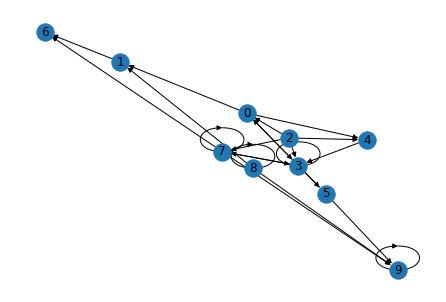

ALPHA: 0.25
(9, 0.13603201162084394) (9, 0.15347) (9, 0.13594551824122303)
(3, 0.12996754952323333) (3, 0.14538) (3, 0.12998506841965665)
(6, 0.10703426127036363) (7, 0.10979) (6, 0.10704061252170141)
(7, 0.09958545051025826) (0, 0.10341) (7, 0.09960343502845295)
(0, 0.09359398956427498) (1, 0.10286) (0, 0.09360611364293983)
(1, 0.09253683693358418) (4, 0.09956) (1, 0.09254401813271607)
(4, 0.09033013131986883) (5, 0.09769) (4, 0.09033619176793983)
(5, 0.08850657916040738) (8, 0.09288) (5, 0.08851897955246915)
(8, 0.0847373206949213) (2, 0.08442) (8, 0.08474160566165125)
(2, 0.07767586940224425) (6, 0.01054) (2, 0.07767845703125001)
ALPHA: 0.5
(9, 0.19837237242373668) (9, 0.22192) (9, 0.1982372572058126)
(3, 0.1519694037640686) (3, 0.16596) (3, 0.15200775640468217)
(6, 0.10804163855532421) (7, 0.10939) (6, 0.10806037620883548)
(7, 0.10017805590292347) (0, 0.09185) (7, 0.10020307139655645)
(0, 0.08251007361654769) (1, 0.09075) (0, 0.08252317571333012)
(5, 0.0807304670026115) (5, 0.08944

C:\Users\samue\AppData\Local\Temp/ipykernel_15220/4091588113.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M = nx.adjacency_matrix(graph).toarray().astype(float)


(9, 0.3013631244963388) (9, 0.33385) (9, 0.30116472307695)
(3, 0.15368942421187634) (3, 0.1681) (3, 0.15374648317106687)
(6, 0.09865036883627082) (7, 0.1042) (6, 0.09867862319236362)
(7, 0.09603068757050198) (5, 0.08094) (7, 0.09606741290188811)
(5, 0.07276670141239468) (0, 0.07559) (5, 0.07279190661351173)
(0, 0.06883257570404504) (1, 0.07057) (0, 0.06885129651099015)
(1, 0.06419875018891602) (4, 0.06512) (1, 0.06421123727909131)
(4, 0.05942507437589173) (8, 0.05233) (4, 0.05943646523928985)
(8, 0.0481377273027581) (2, 0.03932) (8, 0.04814302410026232)
(2, 0.03690556590100667) (6, 0.00998) (2, 0.036908827914586065)
ALPHA: 0.85
(9, 0.47414266960831075) (9, 0.5081) (9, 0.47379414854575336)
(3, 0.12738812033936148) (3, 0.1375) (3, 0.12748836282487355)
(7, 0.07884588449010836) (7, 0.08508) (7, 0.07891039298446693)
(6, 0.07577643628629419) (5, 0.06292) (6, 0.07582606620393297)
(5, 0.05753471825858207) (0, 0.05414) (5, 0.05757897751716207)
(0, 0.05044978824589576) (1, 0.04698) (0, 0.0504826

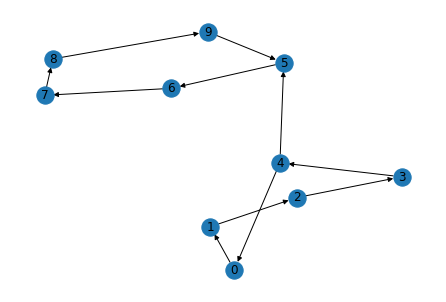

ALPHA: 0.25
(5, 0.11250610351562501) (5, 0.1116) (5, 0.11250000000000002)
(6, 0.10312652587890626) (6, 0.10443) (6, 0.10312500000000002)
(7, 0.10078125000000002) (7, 0.10319) (7, 0.10078125000000002)
(8, 0.10019531250000002) (8, 0.10115) (8, 0.10019531250000002)
(9, 0.10004882812500002) (3, 0.10094) (4, 0.1)
(4, 0.09995117187500002) (4, 0.09912) (9, 0.1)
(3, 0.09980468750000002) (9, 0.09887) (3, 0.09980468750000002)
(2, 0.09921875000000002) (2, 0.09881) (2, 0.09921875000000002)
(1, 0.09687347412109376) (1, 0.09524) (1, 0.09687500000000002)
(0, 0.08749389648437501) (0, 0.08665) (0, 0.08750000000000001)
ALPHA: 0.5
(5, 0.125396728515625) (5, 0.12431) (5, 0.125390625)
(6, 0.1126983642578125) (6, 0.11334) (6, 0.1126953125)
(7, 0.10634765625) (7, 0.10689) (7, 0.10625000000000001)
(8, 0.103173828125) (8, 0.10476) (8, 0.10312500000000001)
(9, 0.1015869140625) (9, 0.10185) (9, 0.1015625)
(4, 0.0984130859375) (4, 0.09707) (4, 0.09843750000000001)
(3, 0.096826171875) (3, 0.09636) (3, 0.096875)
(2

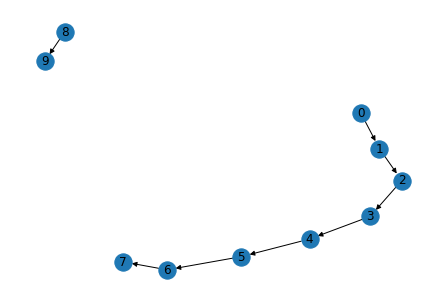

ALPHA: 0.25
(7, 0.10690357283203127) (6, 0.13144) (4, 0.10687406250000002)
(6, 0.10689746931640626) (5, 0.12889) (5, 0.10687406250000002)
(5, 0.10687793806640628) (3, 0.12883) (6, 0.10687406250000002)
(4, 0.10679956892578127) (4, 0.12848) (7, 0.10687406250000002)
(3, 0.10648640974609377) (2, 0.12717) (3, 0.10648343750000003)
(2, 0.10523366560546876) (1, 0.12059) (2, 0.10523343750000003)
(9, 0.10022258455078126) (8, 0.09674) (1, 0.10021781250000002)
(1, 0.10022258455078126) (0, 0.09613) (9, 0.10021781250000002)
(8, 0.08017810320312502) (9, 0.02116) (0, 0.08017562500000001)
(0, 0.08017810320312502) (7, 0.02057) (8, 0.08017562500000001)
ALPHA: 0.5
(7, 0.12068115775175627) (6, 0.14481) (7, 0.12066689600000001)
(6, 0.12020839603300626) (5, 0.14393) (6, 0.120198146)
(5, 0.11926224407988126) (4, 0.14382) (5, 0.119245021)
(4, 0.11736922892363126) (3, 0.13778) (4, 0.11735908350000002)
(3, 0.11358238690800626) (2, 0.12931) (3, 0.1135803335)
(2, 0.10601023309081875) (1, 0.11036) (2, 0.106016146)


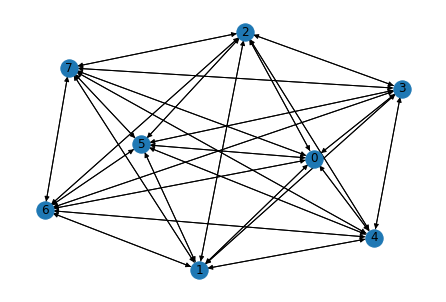

ALPHA: 0.25
(7, 0.125) (1, 0.12673) (0, 0.125)
(6, 0.125) (5, 0.12572) (1, 0.125)
(5, 0.125) (2, 0.12565) (2, 0.125)
(4, 0.125) (0, 0.12496) (3, 0.125)
(3, 0.125) (6, 0.12491) (4, 0.125)
(2, 0.125) (7, 0.12435) (5, 0.125)
(1, 0.125) (4, 0.12396) (6, 0.125)
(0, 0.125) (3, 0.12372) (7, 0.125)
ALPHA: 0.5
(7, 0.12499999999999999) (2, 0.12713) (0, 0.125)
(6, 0.12499999999999999) (3, 0.12592) (1, 0.125)
(5, 0.12499999999999999) (0, 0.12555) (2, 0.125)
(4, 0.12499999999999999) (4, 0.12523) (3, 0.125)
(3, 0.12499999999999999) (6, 0.12466) (4, 0.125)
(2, 0.12499999999999999) (5, 0.12464) (5, 0.125)
(1, 0.12499999999999999) (7, 0.12384) (6, 0.125)
(0, 0.12499999999999999) (1, 0.12303) (7, 0.125)
ALPHA: 0.7
(7, 0.12499999999999999) (4, 0.1268) (0, 0.125)
(6, 0.12499999999999999) (7, 0.12578) (1, 0.125)
(5, 0.12499999999999999) (1, 0.12538) (2, 0.125)
(4, 0.12499999999999999) (2, 0.12511) (3, 0.125)
(3, 0.12499999999999999) (6, 0.12495) (4, 0.125)
(2, 0.12499999999999999) (3, 0.12478) (5, 0.125)
(

In [188]:
names = ['G_random', 'G_spider_trap', 'G_dead_end', 'G_complete']
graphs = [G_random, G_spider_trap, G_dead_end, G_complete]

for name, graph in zip(names, graphs):
    print("==================")
    print("GRAPH_NAME:", name)
    
    nx.draw(graph, with_labels=True)
    plt.show()
    
    for alpha in [0.25, 0.5, 0.7, 0.85, 1.0]:
        print('ALPHA:', alpha)
        
        nx_result = networkx_pagerank(graph, alpha)
        rw_result = randomwalk_pagerank(graph, alpha)
        sm_result = stochastic_matrix_pagerank(graph, alpha)
        
        for nx_node, rw_node, sm_node in zip(nx_result, rw_result, sm_result):
            print(nx_node, rw_node, sm_node)

# Catan fandom Wikipedia

The scripts used for scraping are in the *scraper.ipynb* file.

Pages from Fandom Wikipedia: https://catan.fandom.com/wiki/Main_Page

In [76]:
with open('catan_links.pickle', 'rb') as handle:
    d = pickle.load(handle)

G_catan = nx.DiGraph(d)

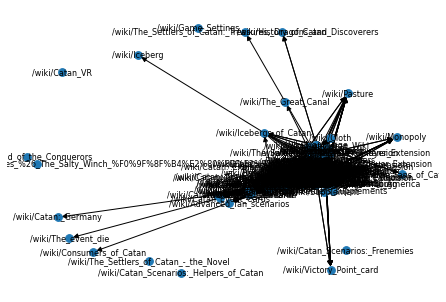

In [77]:
nx.draw(G_catan, with_labels=True, node_size=60, font_size=8)

In [78]:
catan_pr = networkx_pagerank(G_catan)
catan_pr

[('/wiki/The_Settlers_of_Catan', 0.09507043788129868),
 ('/wiki/Catan:_Seafarers', 0.0334502122968494),
 ('/wiki/Catan:_Traders_%26_Barbarians', 0.03157848403822738),
 ('/wiki/City', 0.028209817147406564),
 ('/wiki/Scenario', 0.027405296499100232),
 ('/wiki/Catan:_Cities_%26_Knights', 0.025478089999639967),
 ('/wiki/Mayfair_Games', 0.02517185726332262),
 ('/wiki/Settlement', 0.024049676117919545),
 ('/wiki/Kosmos', 0.023394140611819766),
 ('/wiki/Klaus_Teuber', 0.0222093573542973),
 ('/wiki/Resource_card', 0.022140029293788707),
 ('/wiki/Catan', 0.021499251838591187),
 ('/wiki/The_Settlers_of_Catan_5-6_Player_Extension', 0.017030888275110147),
 ('/wiki/Fishermen_of_Catan', 0.014599431067082088),
 ('/wiki/Catan:_Explorers_%26_Pirates', 0.012897649223976486),
 ('/wiki/Brick', 0.012478849694961238),
 ('/wiki/Lumber', 0.012411948352274035),
 ('/wiki/Development_card', 0.012266407680459203),
 ('/wiki/Out_of_the_Box', 0.011497624817366344),
 ('/wiki/Grain', 0.01131216249896002),
 ('/wiki/Tra

### Review example subgraph

**NOTE:** the ranking of pages in different subset of pages may differ significantly from the original, e.g. */wiki/Catan:_Traders_%26_Barbarians* which had the third highest PageRank value in the original graph

Pages with the highest PageRank: ['/wiki/The_Settlers_of_Catan', '/wiki/Catan:_Seafarers', '/wiki/Catan:_Traders_%26_Barbarians', '/wiki/City', '/wiki/Scenario', '/wiki/Catan:_Cities_%26_Knights', '/wiki/Mayfair_Games', '/wiki/Settlement', '/wiki/Kosmos', '/wiki/Klaus_Teuber', '/wiki/Resource_card', '/wiki/Catan', '/wiki/The_Settlers_of_Catan_5-6_Player_Extension', '/wiki/Fishermen_of_Catan', '/wiki/Catan:_Explorers_%26_Pirates', '/wiki/Brick', '/wiki/Lumber', '/wiki/Development_card', '/wiki/Out_of_the_Box', '/wiki/Grain']
('/wiki/The_Settlers_of_Catan', 0.1692382409739938)
('/wiki/Catan:_Seafarers', 0.07135309714174497)
('/wiki/Settlement', 0.0651802325265403)
('/wiki/City', 0.06366265426500295)
('/wiki/Resource_card', 0.06324301486926509)
('/wiki/Lumber', 0.049871989283783696)
('/wiki/Grain', 0.049871989283783696)
('/wiki/Brick', 0.049871989283783696)
('/wiki/Mayfair_Games', 0.04788644500945214)
('/wiki/Out_of_the_Box', 0.0455401570503693)
('/wiki/Catan', 0.043146281148987255)
('/wi

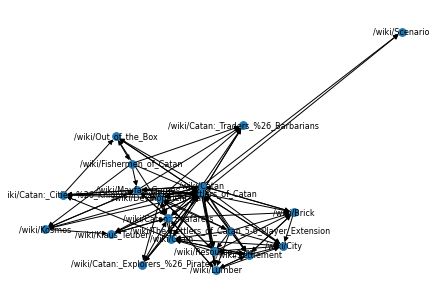

In [79]:
number_of_pages = 20
pages_with_highest_pagerank = [page_link for page_link, pr_value in catan_pr[:number_of_pages]]

print("Pages with the highest PageRank:", pages_with_highest_pagerank)

G_sub_catan = G_catan.subgraph(pages_with_highest_pagerank)

for t in networkx_pagerank(G_sub_catan):
    print(t)
    
nx.draw(G_sub_catan, with_labels=True, node_size=60, font_size=8) 

### Task 3 - Analysis of the subset of pages about building costs [4p]

<img src="catan_building_costs.jpg" alt="drawing" width="500"/>

In [80]:
interesting_pages = [
    '/wiki/Lumber', '/wiki/Brick', '/wiki/Wool', '/wiki/Grain', '/wiki/Ore', # Resources
    '/wiki/Road', '/wiki/Settlement', '/wiki/City', '/wiki/Development_card' # Buildings (and "build-able" Development card)
]

G_sub_buildings = G_catan.subgraph(interesting_pages).copy()

display(pd.DataFrame(nx.adjacency_matrix(G_sub_buildings).todense(), index=list(G_sub_buildings.nodes), columns=list(G_sub_buildings.nodes)))

for t in networkx_pagerank(G_sub_buildings):
    print(t)
    
nx.draw(G_sub_buildings, with_labels=True, node_size=60, font_size=8) 

C:\Users\samue\AppData\Local\Temp/ipykernel_15220/473471177.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  display(pd.DataFrame(nx.adjacency_matrix(G_sub_buildings).todense(), index=list(G_sub_buildings.nodes), columns=list(G_sub_buildings.nodes)))


,/wiki/Development_card,/wiki/Brick,/wiki/Ore,/wiki/Wool,/wiki/City,/wiki/Grain,/wiki/Lumber,/wiki/Road,/wiki/Settlement
/wiki/Development_card,0,0,0,0,0,0,0,1,0
/wiki/Brick,0,0,0,0,1,0,0,1,1
/wiki/Ore,1,0,0,0,1,0,0,0,1
/wiki/Wool,1,0,0,0,1,0,0,0,1
/wiki/City,0,0,0,0,0,0,0,0,0
/wiki/Grain,1,0,0,0,1,0,0,0,1
/wiki/Lumber,0,0,0,0,1,0,0,1,1
/wiki/Road,0,1,0,0,1,0,1,0,1
/wiki/Settlement,0,1,1,1,1,1,1,0,0


('/wiki/City', 0.20085746141355568)
('/wiki/Settlement', 0.1759333697951493)
('/wiki/Road', 0.16371476308045152)
('/wiki/Lumber', 0.09534974331949728)
('/wiki/Brick', 0.09534974331949728)
('/wiki/Development_card', 0.08711274778232866)
('/wiki/Wool', 0.06056072376317328)
('/wiki/Ore', 0.06056072376317328)
('/wiki/Grain', 0.06056072376317328)
Error in callback <function flush_figures at 0x0000029A7E99D750> (for post_execute):


KeyboardInterrupt: 

**Answer the questions:**

1. **[2p]** What is the reason for *City*'s advantage over *Settlement*? Take into account how the PageRank value is calculated
2. **[2p]** Why are *Lumber* and *Brick* rated higher than other resources (*Wool*, *Ore*, *Grain*)? Take into account how the PageRank value is calculated

1. City is a direct upgrade of settlement, thus the settlement points to city and not vice versa.

2. More articles point to lumber and brick than to wool, ore and grain. Thus, the PageRank value is higher.

### Task 4 - Analysis of the subset of pages about resources and hexes [5p]

<img src="catan_hexes_resources.jpg" alt="drawing" width="500"/>

C:\Users\samue\AppData\Local\Temp/ipykernel_15220/4201863129.py:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  display(pd.DataFrame(nx.adjacency_matrix(G_sub_res).todense(), index=list(G_sub_res.nodes), columns=list(G_sub_res.nodes)))


,/wiki/Resource_card,/wiki/Brick,/wiki/Ore,/wiki/Wool,/wiki/Grain,/wiki/Pasture,/wiki/Lumber,/wiki/Hill,/wiki/Mountain,/wiki/Field,/wiki/Forest
/wiki/Resource_card,0,1,1,1,1,1,1,1,1,1,1
/wiki/Brick,0,0,0,0,0,0,0,1,0,0,0
/wiki/Ore,0,0,0,0,0,0,0,0,1,0,0
/wiki/Wool,0,0,0,0,0,1,0,0,0,0,0
/wiki/Grain,0,0,0,0,0,0,0,0,0,1,0
/wiki/Pasture,0,0,0,0,0,0,0,0,0,0,0
/wiki/Lumber,0,0,0,0,0,0,0,0,0,0,1
/wiki/Hill,0,1,0,0,0,0,0,0,0,0,0
/wiki/Mountain,0,0,1,0,0,0,0,0,0,0,0
/wiki/Field,0,0,0,0,1,0,0,0,0,0,0


('/wiki/Ore', 0.11674381846559577)
('/wiki/Mountain', 0.11674381846559577)
('/wiki/Lumber', 0.11674381846559577)
('/wiki/Hill', 0.11674381846559577)
('/wiki/Grain', 0.11674381846559577)
('/wiki/Forest', 0.11674381846559577)
('/wiki/Field', 0.11674381846559577)
('/wiki/Brick', 0.11674381846559577)
('/wiki/Pasture', 0.032397560649920214)
('/wiki/Wool', 0.017511915486865957)
('/wiki/Resource_card', 0.01613997613844777)


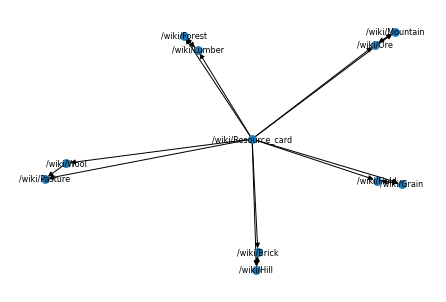

In [ ]:
interesting_pages = [
    '/wiki/Resource_Hex', '/wiki/Resource_card', # A place from which to get a resource, Resource
    '/wiki/Forest', '/wiki/Lumber', 
    '/wiki/Hill', '/wiki/Brick',
    '/wiki/Pasture', '/wiki/Wool', 
    '/wiki/Field', '/wiki/Grain', 
    '/wiki/Mountain', '/wiki/Ore',
]

G_sub_res = G_catan.subgraph(interesting_pages)

display(pd.DataFrame(nx.adjacency_matrix(G_sub_res).todense(), index=list(G_sub_res.nodes), columns=list(G_sub_res.nodes)))

for t in networkx_pagerank(G_sub_res):
    print(t)

nx.draw(G_sub_res, with_labels=True, node_size=60, font_size=8) 

**Answer the questions:**

1. **[2p]** Why are the PageRank values for the *Pasture-Wool* pair lower than for other resource's pairs (e.g. *Mountain-Ore*)? What changes to the structure of the graph will make them have comparable PageRank values?
2. **[3p]** Replace *'/wiki/Hex'* with *'/wiki/Resource_hex'*. Try to explain why the PageRank values changed a lot for each group of pages.

1. Because one pair is bidirectional (Mountain-Ore) and the other is not (Pasture-Wool). The PageRank value is higher for bidirectional links.
2. There are some incoming connections in rEsource_hex, but not in Hex.

# Tram stops graph in Poznań

The scripts used for scraping are in the *scraper.ipynb* file.

Connections between the tram stops come from the ZTM Poznań website: https://www.ztm.poznan.pl/pl/rozklad-jazdy

In [ ]:
with open('tram_stops.pickle', 'rb') as handle:
    d = pickle.load(handle)

G_tram = nx.DiGraph(d)

['Junikowo', 'Cmentarna', 'Grotkowska', 'Budziszyńska', 'Rondo Skubiszewskiego', 'Węgorka', 'Stadion Miejski', 'Drzewieckiego', 'Grochowska', 'Ostroroga', 'Rondo Nowaka-Jeziorańskiego', 'Arena', 'Arciszewskiego', 'Głogowska/Hetmańska', 'Kolejowa', 'Traugutta', 'Rolna', 'Hetmańska Wiadukt', 'Rondo Starołęka', 'Rondo Żegrze', 'Żegrze I', 'Żegrze II', 'Żegrze III', 'Os. Czecha', 'Piaśnicka Rynek', 'Piaśnicka/Kurlandzka', 'Szwedzka', 'Szwajcarska', 'Franowo', 'Dębiec PKM', 'Wspólna', 'HCP', 'Pamiątkowa', 'Kosińskiego', 'Rynek Wildecki', 'Św. Czesława', 'Wierzbięcice', 'Poznań Główny', 'Uniwersytet Ekonomiczny', 'Rondo Kaponiera', 'Stare Zoo', 'Kraszewskiego', 'Rynek Jeżycki', 'Polna', 'Żeromskiego', 'Ogrody', 'Matejki', 'Bałtyk', 'Most Teatralny', 'Poznańska', 'Wielkopolska', 'Armii Poznań', 'Żniwna', 'Pasieka', 'Kmieca', 'Przełajowa', 'Wilczak', 'Serbska', 'Włodarska', 'Lechicka/Naramowicka', 'Naramowice', 'Os. Łokietka', 'Jasna Rola', 'Błażeja', 'Wojskowa', 'Unii Lubelskiej', 'Wagrowska'

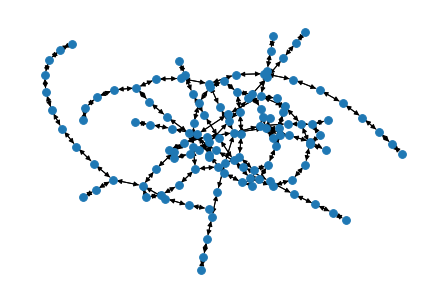

In [ ]:
print(G_tram.nodes)
nx.draw(G_tram, with_labels=False, node_size=60, font_size=8)

### Task 5 - Test tram stops PageRank with different alpha values [2p]

In [ ]:
for alpha in [0.0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.0]:
    print('ALPHA:', alpha)
    for tram_stop in stochastic_matrix_pagerank(G_tram, alpha)[:5]:
        print(tram_stop)

ALPHA: 0.0
('Junikowo', 0.007751937984496124)
('Cmentarna', 0.007751937984496124)
('Grotkowska', 0.007751937984496124)
('Budziszyńska', 0.007751937984496124)
('Rondo Skubiszewskiego', 0.007751937984496124)
ALPHA: 0.1
('Rondo Kaponiera', 0.008907763319798204)
('Rondo Śródka', 0.008828757536606373)
('Rondo Nowaka-Jeziorańskiego', 0.008505191029900333)
('Most Teatralny', 0.008491732145054404)
('Traugutta', 0.008483688630490956)
ALPHA: 0.25
('Rondo Kaponiera', 0.010547798787596867)
('Rondo Śródka', 0.010172564079724465)
('Rondo Nowaka-Jeziorańskiego', 0.0095566104572036)
('Most Teatralny', 0.009556330378461422)
('Traugutta', 0.009452741026100936)
ALPHA: 0.5
('Rondo Kaponiera', 0.013187501759817491)
('Rondo Śródka', 0.011904559145334436)
('Most Teatralny', 0.011308600492030016)
('Rondo Nowaka-Jeziorańskiego', 0.01111090038954813)
('Traugutta', 0.010880917654251275)
ALPHA: 0.75
('Rondo Kaponiera', 0.016106169350853086)
('Most Teatralny', 0.013252667997925228)
('Rondo Śródka', 0.0132291451633

**Answer the question:**

1. **[2p]** Try to explain why, as the $\alpha$ value increases, the differences between the PageRank values for the *best* tram stops also increase?

1. They are more likely to be visited by not-random surfing. The page rank increases with the number of incoming links (popularity as well).

### Task 6 - Subset of tram stops [6p]

C:\Users\samue\AppData\Local\Temp/ipykernel_15220/1373251047.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  display(pd.DataFrame(nx.adjacency_matrix(G_sub_tram).todense(), index=list(G_sub_tram.nodes), columns=list(G_sub_tram.nodes)))


,Fredry,Matejki,Zamek,Żeromskiego,Polna,Arena,Most Dworcowy,Bałtyk,Dworzec Zachodni,Stare Zoo,...,Ostroroga,Rondo Kaponiera,Rynek Jeżycki,Most Teatralny,Bukowska,Wojskowa,Kraszewskiego,Rondo Nowaka-Jeziorańskiego,Ogrody,Poznańska
Fredry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Matejki,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Zamek,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Żeromskiego,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Polna,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Arena,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Most Dworcowy,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
Bałtyk,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Dworzec Zachodni,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Stare Zoo,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


('Rondo Kaponiera', 0.10311492342065422)
('Rondo Nowaka-Jeziorańskiego', 0.09464095833656555)
('Most Teatralny', 0.07952822055665597)
('Żeromskiego', 0.06756031128844965)
('Most Dworcowy', 0.06678848258786278)
('Rynek Jeżycki', 0.05966812696908178)
('Bałtyk', 0.05403281497460185)
('Dworzec Zachodni', 0.05117287323076813)
('Bukowska', 0.046395008440801064)
('Polna', 0.04318937708072051)
('Matejki', 0.04256301486865146)
('Kraszewskiego', 0.04063118293592473)
('Stare Zoo', 0.039019481284290315)
('Poznań Główny', 0.0358343796650426)
('Ostroroga', 0.027253803788455606)
('Arena', 0.027253803788455606)
('Ogrody', 0.026284061795202596)
('Wojskowa', 0.02523236084946654)
('Poznańska', 0.024043032496499937)
('Fredry', 0.024043032496499937)
('Zamek', 0.02175074914534912)


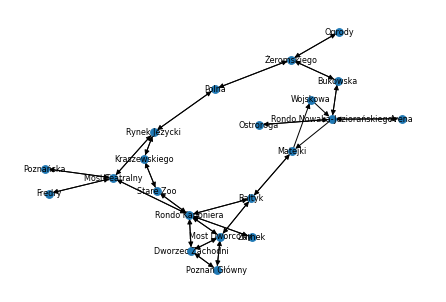

In [ ]:
interesting_stops = [
    'Ogrody', 'Żeromskiego', 'Polna', 'Rynek Jeżycki', 'Kraszewskiego', 'Stare Zoo', 'Most Dworcowy',
    'Bałtyk', 'Rondo Kaponiera', 'Bukowska', 'Matejki', 'Wojskowa', 'Ostroroga', 'Rondo Nowaka-Jeziorańskiego', 
    'Arena', 'Most Teatralny', 'Poznańska', 'Fredry', 'Zamek', 'Dworzec Zachodni', 'Most Dworcowy', 'Poznań Główny',
]

G_sub_tram = G_tram.subgraph(interesting_stops)

display(pd.DataFrame(nx.adjacency_matrix(G_sub_tram).todense(), index=list(G_sub_tram.nodes), columns=list(G_sub_tram.nodes)))

for t in networkx_pagerank(G_sub_tram):
    print(t)

nx.draw(G_sub_tram, with_labels=True, node_size=60, font_size=8) 

**NOTE:** *Wojskowa* stop is an interesting case because it is available only in one direction of tram traffic

**Answer the question:**


1. **[2p]** Why does *Żeromskiego* have a comparable (even slightly higher) PageRank than *Most Dworcowy*, even though the latter has more neighbors in the graph?

2. **[4p]** Suggest a modification of the PageRank algorithm that would take into account the number of lines that pass between adjacent stops. Describe which elements of the algorithm you would modify for this purpose.

### Task 7 - TrustRank algorithm implementation [3p]

Modify the PageRank implementation from the *stochastic matrix approach*. The only change from the PageRank implementation is the assumption that in TrustRank a *random jump* to *any* page always ends in one of the *trusted* pages. For this reason, it is also necessary to provide a list of trusted nodes. Modify the mathematical formula and the algorithm implementation in such way.

In [ ]:
def trustrank(graph: nx.DiGraph, trusted_nodes: list, alpha: float = 0.85, epsilon: float = 0.0000001) -> list:
#     ...

trustrank(G_random, [0, 2])

In [ ]:
G_trustrank = nx.DiGraph()

G_trustrank.add_nodes_from(range(7))

G_trustrank.add_edge(0, 1)
G_trustrank.add_edge(2, 1)
G_trustrank.add_edge(3, 1)
G_trustrank.add_edge(4, 1)
G_trustrank.add_edge(1, 5)
G_trustrank.add_edge(5, 2)
G_trustrank.add_edge(5, 6)
G_trustrank.add_edge(6, 0)
G_trustrank.add_edge(6, 2)
G_trustrank.add_edge(0, 3)
G_trustrank.add_edge(6, 4)
    
print(G_trustrank.nodes)
print(nx.adjacency_matrix(G_trustrank).todense())
nx.draw(G_trustrank, with_labels=True)

# trustrank(G_trustrank, [3, 4])

### Task 8 - TrustRank example [4p]

For the *G_trustrank* graph above, assume that good pages are 3 and 4.

**Answer the questions:**

1. **[2p]** Why did the *trusted* nodes (3, 4) have one of the lowest TrustRank values in the graph?
2. **[2p]** What should be done to strengthen their importance?

### Task 9 - HITS algorithm implementation [5p]

Implement the **HITS** algorithm. You can choose whether you want to use the iterative version or use the eigenvector approach. Return results as two lists of tuples (similar to PageRank and TrustRank, but in two separate lists - **authorities** and **hubs**). For an iterative approach, normalize the vectors after each iteration (sum of values equals 1).

**Hint:** update the values of both vectors *simultaneously*. Use the *hubs* and *authorities* values from the previous iteration to update both vectors. Don't use an updated *hubs* vector to update *authorities* during the same iteration or vice versa.

In [ ]:
def hits(graph: nx.DiGraph, epsilon: float = 0.0000001) -> list:
#     ...

hits(G_dead_end)

### Task 10 - HITS analysis [5p]

In [ ]:
interesting_pages = [
    '/wiki/Hex', '/wiki/Resource_card', # A place from which to get a resource, Resource
    '/wiki/Forest', '/wiki/Lumber', 
    '/wiki/Hill', '/wiki/Brick',
    '/wiki/Pasture', '/wiki/Wool', 
    '/wiki/Field', '/wiki/Grain', 
    '/wiki/Mountain', '/wiki/Ore',
]

G_sub_res = G_catan.subgraph(interesting_pages)

nx.draw(G_sub_res, with_labels=True, node_size=60, font_size=8)

In [ ]:
hits(G_sub_res)

**Answer the question:**

1. **[2p]** Check the HITS values in the chart above, then change the *Hex* to *Resource_hex* once again. How did this affect the results and why?

In [ ]:
nx.draw(G_sub_tram, with_labels=True, node_size=60, font_size=8) 

In [ ]:
hits(G_sub_tram)

**Answer the question:**

2. **[3p]** Why are the results for *authorities* and *hubs* very similar?